<a href="https://colab.research.google.com/github/HARSHINI20/-TechnoHacks-EduTech-/blob/main/SOCIAL_MEDIA_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# For analysis and cleaning
import pandas as pd
import numpy as np
# for visaluatztion
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
df.shape

(14640, 15)

In [ ]:
df.isnull().sum()


tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [ ]:
df.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

In [ ]:
df.head(1)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)


In [ ]:


# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1

In [ ]:
# Summary statistics of numerical columns
print("Summary statistics of numerical columns:")
print(df.describe())


Summary statistics of numerical columns:
           tweet_id  airline_sentiment_confidence  negativereason_confidence  \
count  1.464000e+04                  14640.000000               10522.000000   
mean   5.692184e+17                      0.900169                   0.638298   
std    7.791112e+14                      0.162830                   0.330440   
min    5.675883e+17                      0.335000                   0.000000   
25%    5.685592e+17                      0.692300                   0.360600   
50%    5.694779e+17                      1.000000                   0.670600   
75%    5.698905e+17                      1.000000                   1.000000   
max    5.703106e+17                      1.000000                   1.000000   

       retweet_count  
count   14640.000000  
mean        0.082650  
std         0.745778  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max        44.000000  


In [ ]:
# Summary of missing values
print("Summary of missing values:")
print(df.isnull().sum())

Summary of missing values:
tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


<ipython-input-16-5be1e32d4856>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='airline_sentiment', order=df['airline_sentiment'].value_counts().index, palette='viridis')


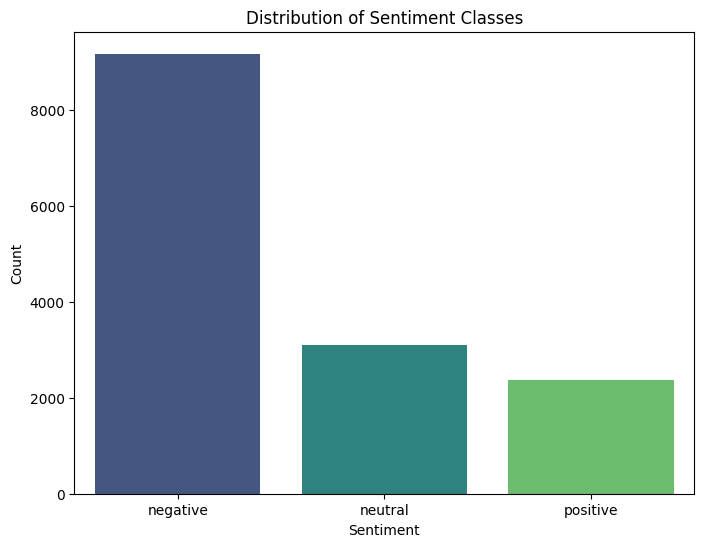

In [ ]:
# Visualize the distribution of sentiment classes
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='airline_sentiment', order=df['airline_sentiment'].value_counts().index, palette='viridis')
plt.title('Distribution of Sentiment Classes')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

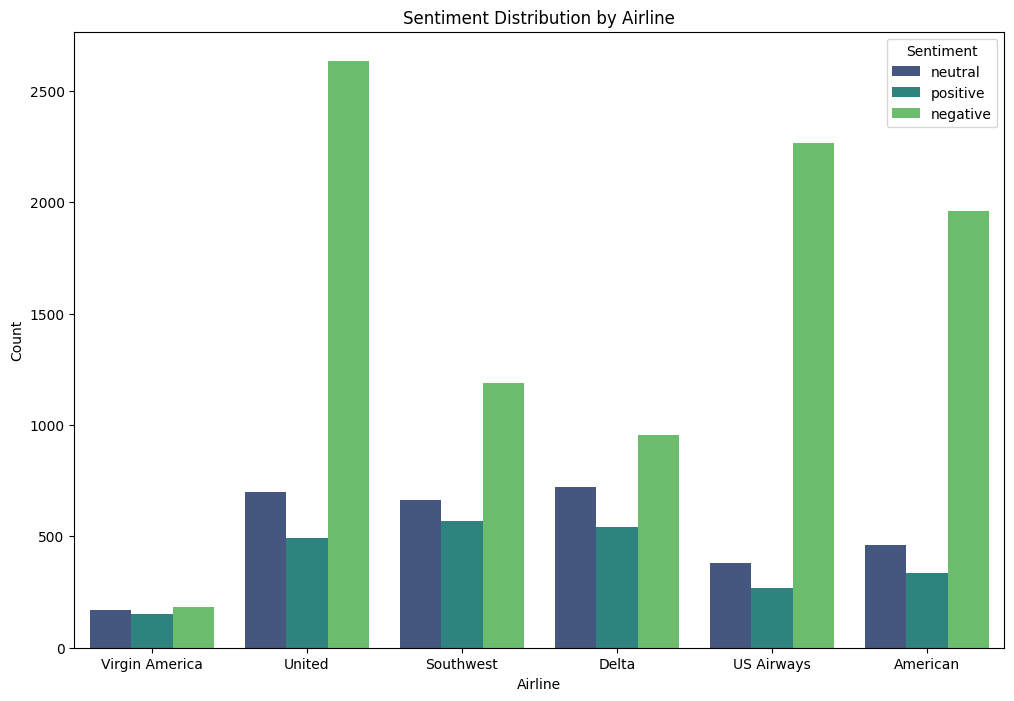

In [ ]:
# Visualize sentiment distribution by airline
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='airline', hue='airline_sentiment', palette='viridis')
plt.title('Sentiment Distribution by Airline')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

<ipython-input-18-cae2b8a52ada>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='negativereason', order=df['negativereason'].value_counts().index, palette='viridis')


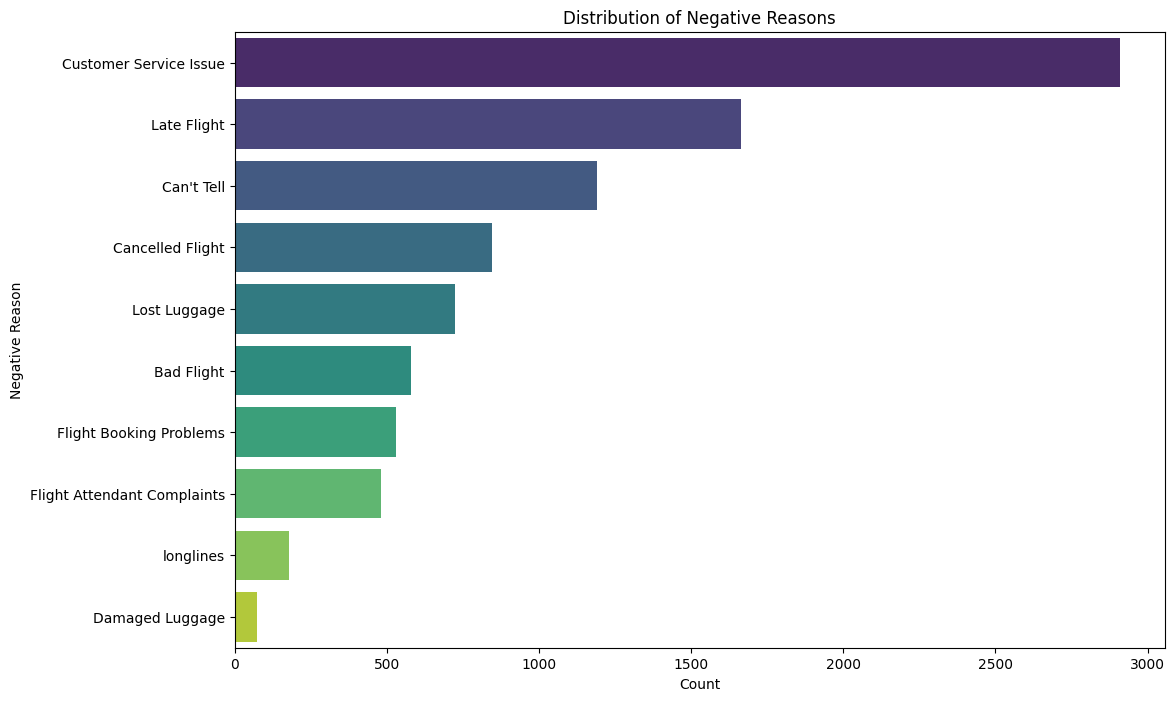

In [ ]:
# Visualize distribution of negative reasons
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='negativereason', order=df['negativereason'].value_counts().index, palette='viridis')
plt.title('Distribution of Negative Reasons')
plt.xlabel('Count')
plt.ylabel('Negative Reason')
plt.show()

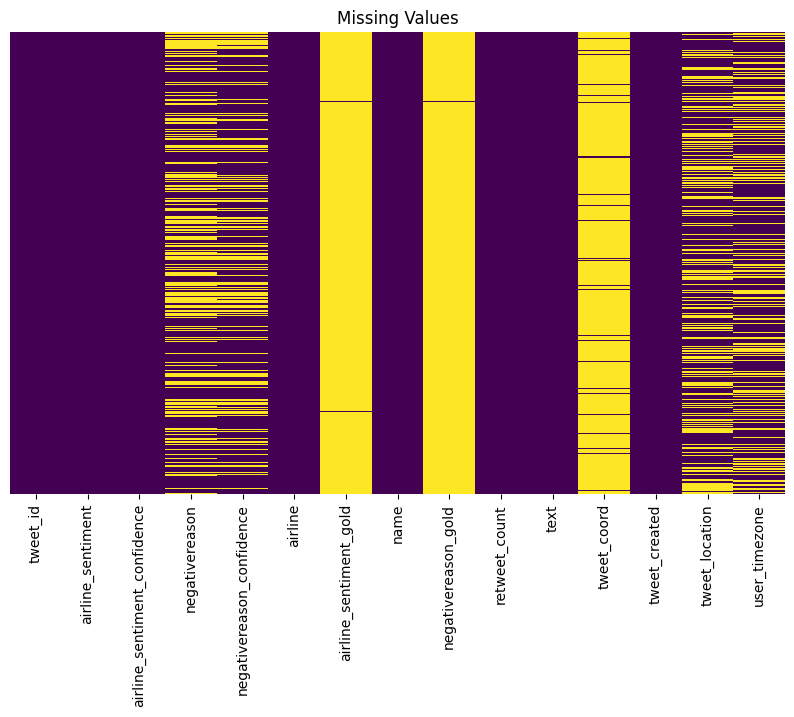

In [ ]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', yticklabels=False, cbar=False)
plt.title('Missing Values')
plt.show()

<ipython-input-20-ce82d3306535>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


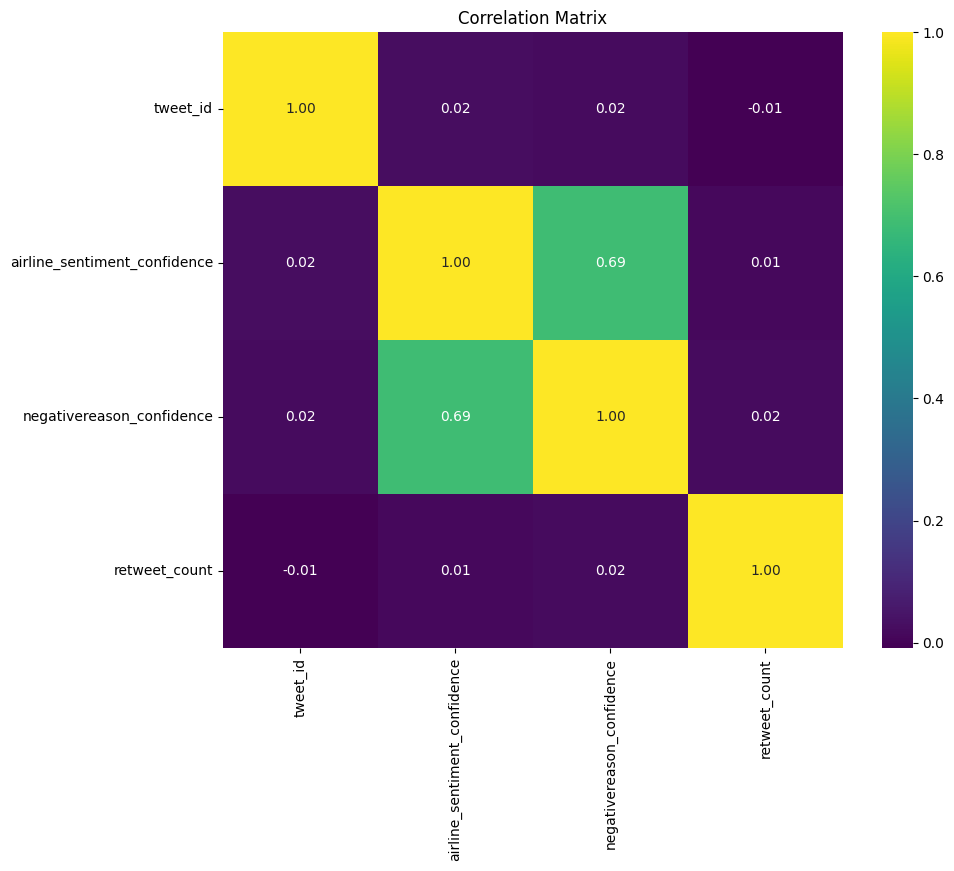

In [ ]:
# Explore correlations between numerical variables
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
missing_percentage = df.isnull().mean() * 100

# Create a new DataFrame to display the results
missing_info = pd.DataFrame({
    'Column': df.columns,
    'Missing Percentage': missing_percentage
})

# Display the missing information
print(missing_info)

                                                    Column  Missing Percentage
tweet_id                                          tweet_id            0.000000
airline_sentiment                        airline_sentiment            0.000000
airline_sentiment_confidence  airline_sentiment_confidence            0.000000
negativereason                              negativereason           37.308743
negativereason_confidence        negativereason_confidence           28.128415
airline                                            airline            0.000000
airline_sentiment_gold              airline_sentiment_gold           99.726776
name                                                  name            0.000000
negativereason_gold                    negativereason_gold           99.781421
retweet_count                                retweet_count            0.000000
text                                                  text            0.000000
tweet_coord                                    tweet

In [ ]:
# Descrip data nurimucal
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


<ipython-input-26-7bdfe23ea540>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


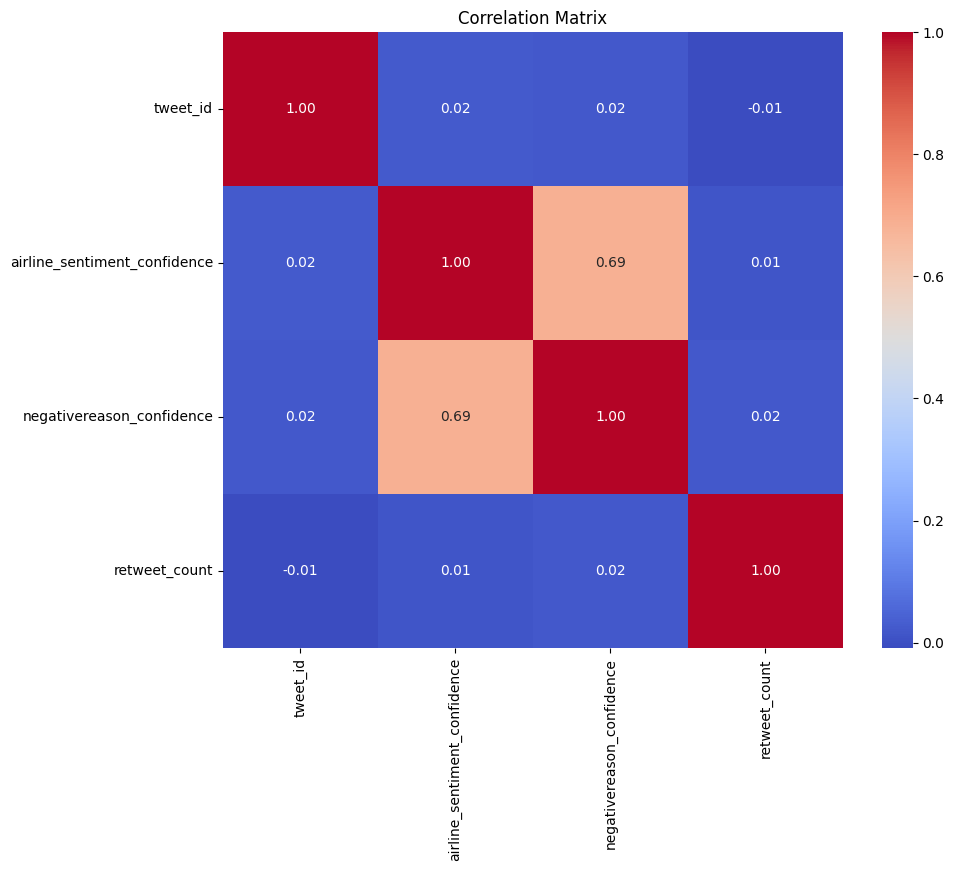

In [ ]:
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
print(df.head())


             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnar

In [ ]:
# Length of Tweets (number of characters)
df['tweet_length'] = df['text'].apply(len)

In [ ]:
# Hashtags Count
df['hashtags_count'] = df['text'].apply(lambda x: x.count('#'))

In [ ]:
# Mentions Count
df['mentions_count'] = df['text'].apply(lambda x: x.count('@'))

# URLs Count (assuming URLs are indicated by 'http' or 'https')
df['urls_count'] = df['text'].apply(lambda x: x.count('http') + x.count('https'))

# Sentiment Analysis (you would need a sentiment analysis library like TextBlob or VADER)
# Example using TextBlob:
from textblob import TextBlob
df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Time-based Features
df['tweet_created'] = pd.to_datetime(df['tweet_created'])
df['day_of_week'] = df['tweet_created'].dt.dayofweek
df['hour_of_day'] = df['tweet_created'].dt.hour

# Location Features (you might need to preprocess or use external services to extract information)
# For example, splitting tweet_location into country, city, etc.
df[['country', 'city']] = df['tweet_location'].str.split(',', n=1, expand=True)

# User Profile Features (assuming you have user profile data)
# Example: follower_count, friends_count, etc.

# Display the updated DataFrame
print(df.head())

             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  ...  \
0                    NaN     cairdin                 NaN              0  ...   
1                    N

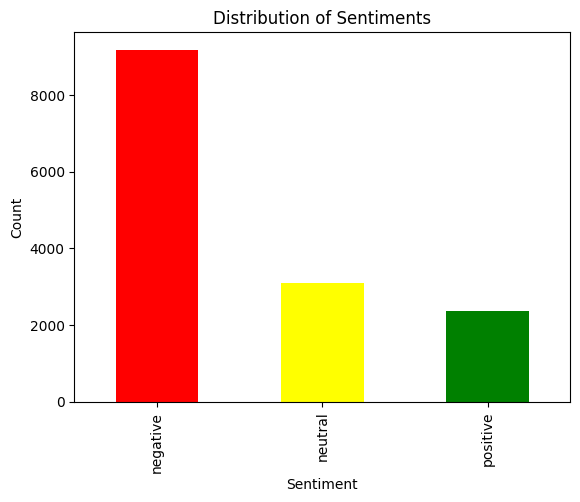

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
sentiment_counts = df['airline_sentiment'].value_counts()

# Create a bar plot
sentiment_counts.plot(kind='bar', color=['red', 'yellow', 'green'])

# Add labels and title
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Show plot
plt.show()

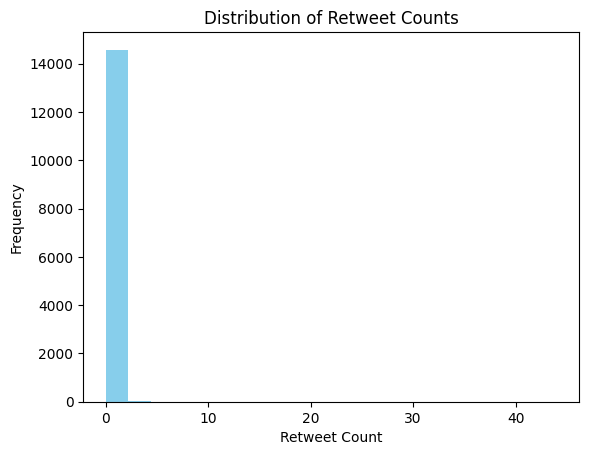

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
plt.hist(df['retweet_count'], bins=20, color='skyblue')

# Add labels and title
plt.title('Distribution of Retweet Counts')
plt.xlabel('Retweet Count')
plt.ylabel('Frequency')

# Show plot
plt.show()

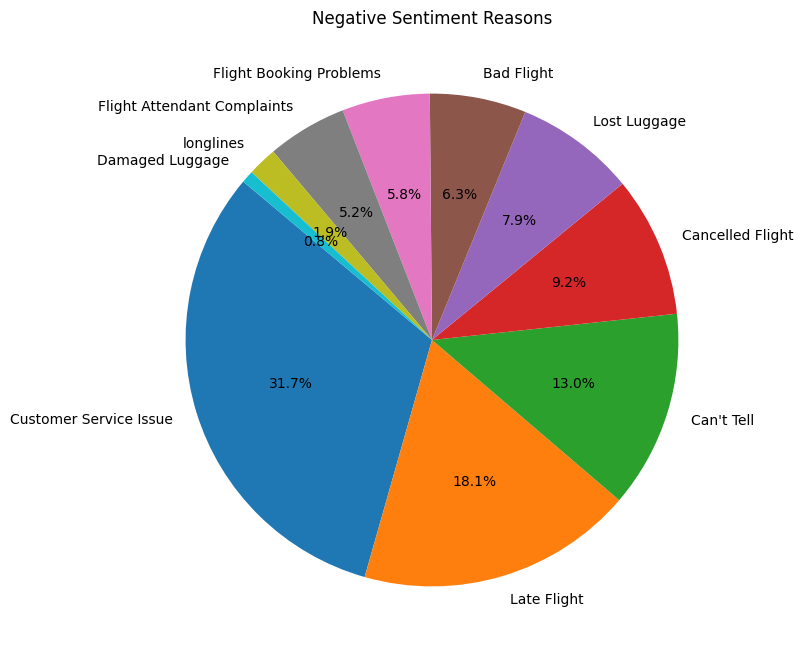

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
negative_reason_counts = df['negativereason'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(negative_reason_counts, labels=negative_reason_counts.index, autopct='%1.1f%%', startangle=140)

# Add title
plt.title('Negative Sentiment Reasons')

# Show plot
plt.show()

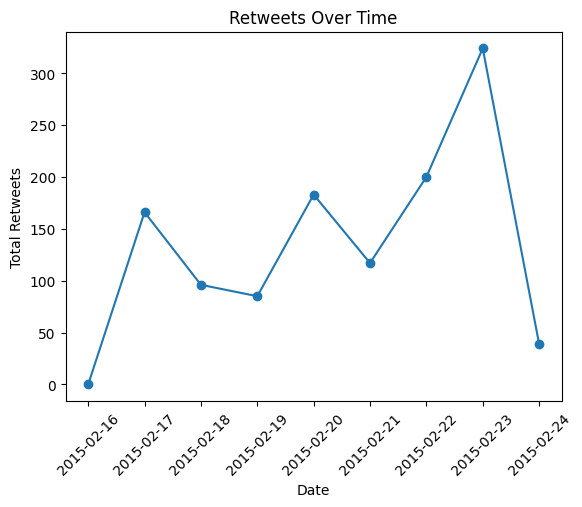

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Convert 'tweet_created' column to datetime
df['tweet_created'] = pd.to_datetime(df['tweet_created'])

# Group by date and sum retweet counts
retweets_over_time = df.groupby(df['tweet_created'].dt.date)['retweet_count'].sum()

# Plot the data
plt.plot(retweets_over_time.index, retweets_over_time.values, marker='o', linestyle='-')

# Add labels and title
plt.title('Retweets Over Time')
plt.xlabel('Date')
plt.ylabel('Total Retweets')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()

In [ ]:

df['hashtags_count'] = df['text'].apply(lambda x: len([word for word in x.split() if word.startswith('#')]))

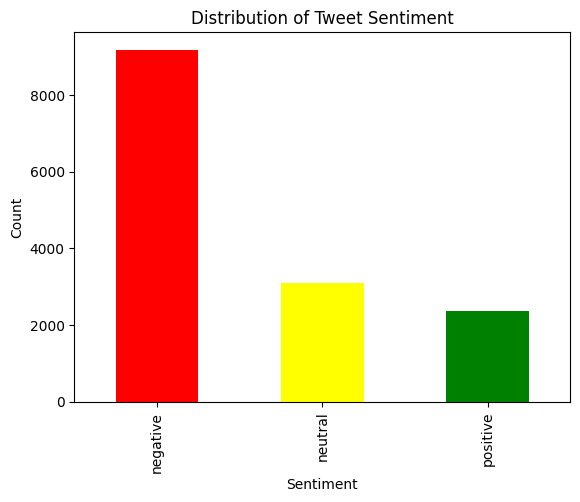

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'airline_sentiment' is the column containing sentiment labels
sentiment_counts = df['airline_sentiment'].value_counts()

# Create a bar plot
sentiment_counts.plot(kind='bar', color=['red', 'yellow', 'green'])

# Add labels and title
plt.title('Distribution of Tweet Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Show plot
plt.show()

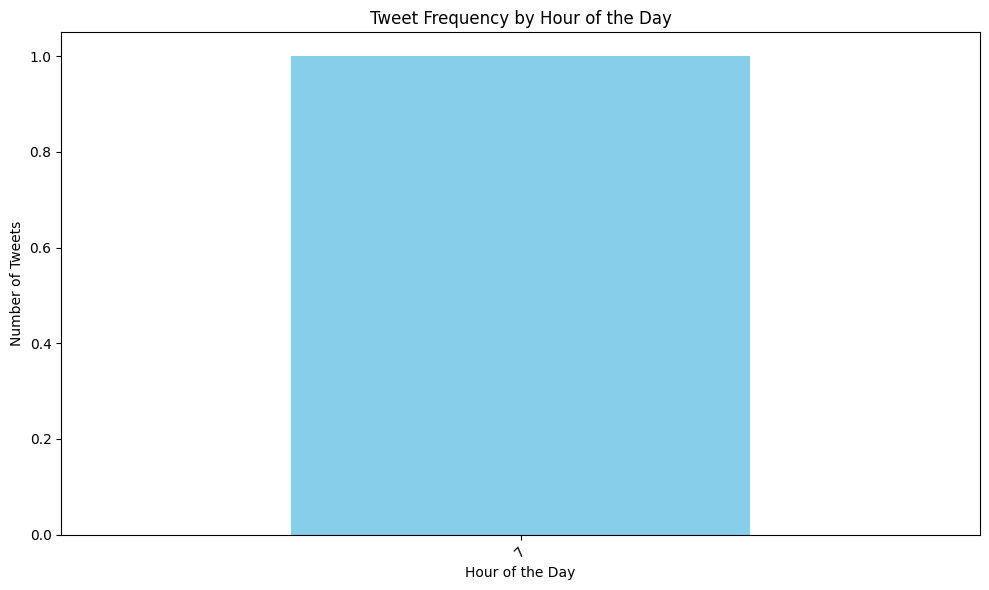

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'tweet_created' is the column containing tweet timestamps
# Convert 'tweet_created' column to datetime
df['tweet_created'] = pd.to_datetime(df['tweet_created'])

# Extract the hour component from the timestamp
df['hour_of_day'] = df['tweet_created'].dt.hour

# Count the frequency of tweets for each hour of the day
tweet_freq_by_hour = df['hour_of_day'].value_counts().sort_index()

# Plot the distribution of tweet frequency across different hours
plt.figure(figsize=(10, 6))
tweet_freq_by_hour.plot(kind='bar', color='skyblue')

# Add labels and title
plt.title('Tweet Frequency by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Tweets')

# Show plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

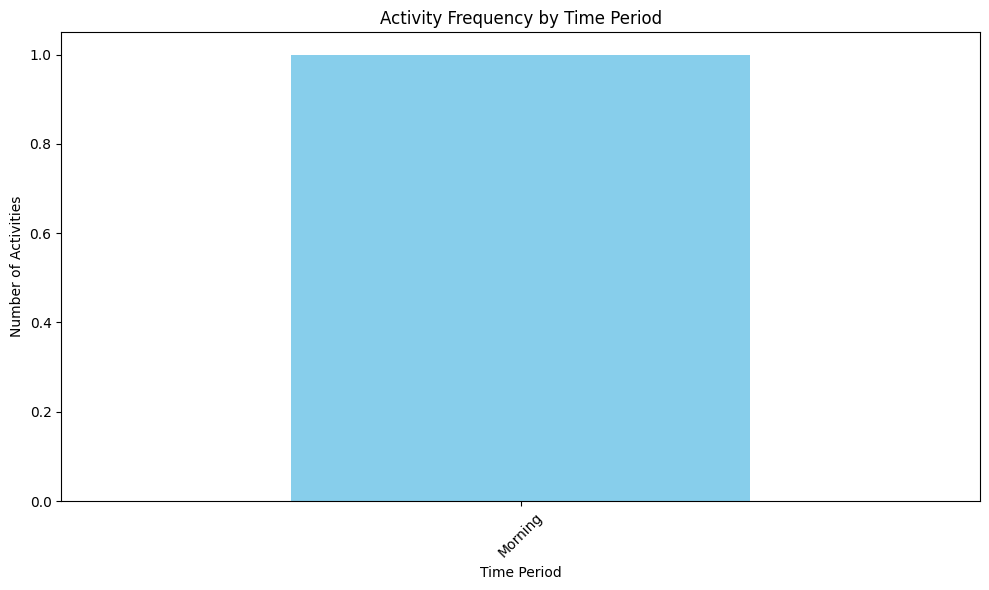

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
# Assuming 'df' is your DataFrame and 'tweet_created' is the column containing tweet timestamps
# Convert 'tweet_created' column to datetime
df['tweet_created'] = pd.to_datetime(df['tweet_created'])

# Extract the hour component from the timestamp
df['hour_of_day'] = df['tweet_created'].dt.hour

# Define time periods
time_periods = {
    'Late Night': range(0, 6),    # 12:00 AM - 6:00 AM
    'Morning': range(6, 12),       # 6:00 AM - 12:00 PM
    'Afternoon': range(12, 18),    # 12:00 PM - 6:00 PM
    'Evening': range(18, 24)       # 6:00 PM - 12:00 AM
}

# Map each hour to its corresponding time period
def map_hour_to_time_period(hour):
    for period, hours in time_periods.items():
        if hour in hours:
            return period

# Apply the mapping function to create a new column
df['time_period'] = df['hour_of_day'].apply(map_hour_to_time_period)

# Count the frequency of activities for each time period
activity_freq_by_period = df['time_period'].value_counts()

# Plot the distribution of activity frequency across different time periods
plt.figure(figsize=(10, 6))
activity_freq_by_period.plot(kind='bar', color='skyblue')

# Add labels and title
plt.title('Activity Frequency by Time Period')
plt.xlabel('Time Period')
plt.ylabel('Number of Activities')

# Show plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()